In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Timeline.csv')

In [3]:
keys = list(df.keys())
years = keys[1:]

In [4]:
names = np.array(df['Name'])
date_list = []
name_list = []
level_list = []

In [5]:
for k in keys[1:]:
    dat = df[k].as_matrix()
    mask = ~np.isnan(dat)
    if np.any(mask):
        date_list.extend([k]*len(names[mask]))
        name_list.extend(names[mask])
        level_list.extend(dat[mask])
    else:
        date_list.extend([k])
        name_list.extend([''])
        level_list.extend([0])

In [6]:
print(len(date_list))
print(len(name_list))
print(len(level_list))

97
97
97


In [7]:
year_labels = [year if np.int(year) % 5 == 0 else '' for year in years]

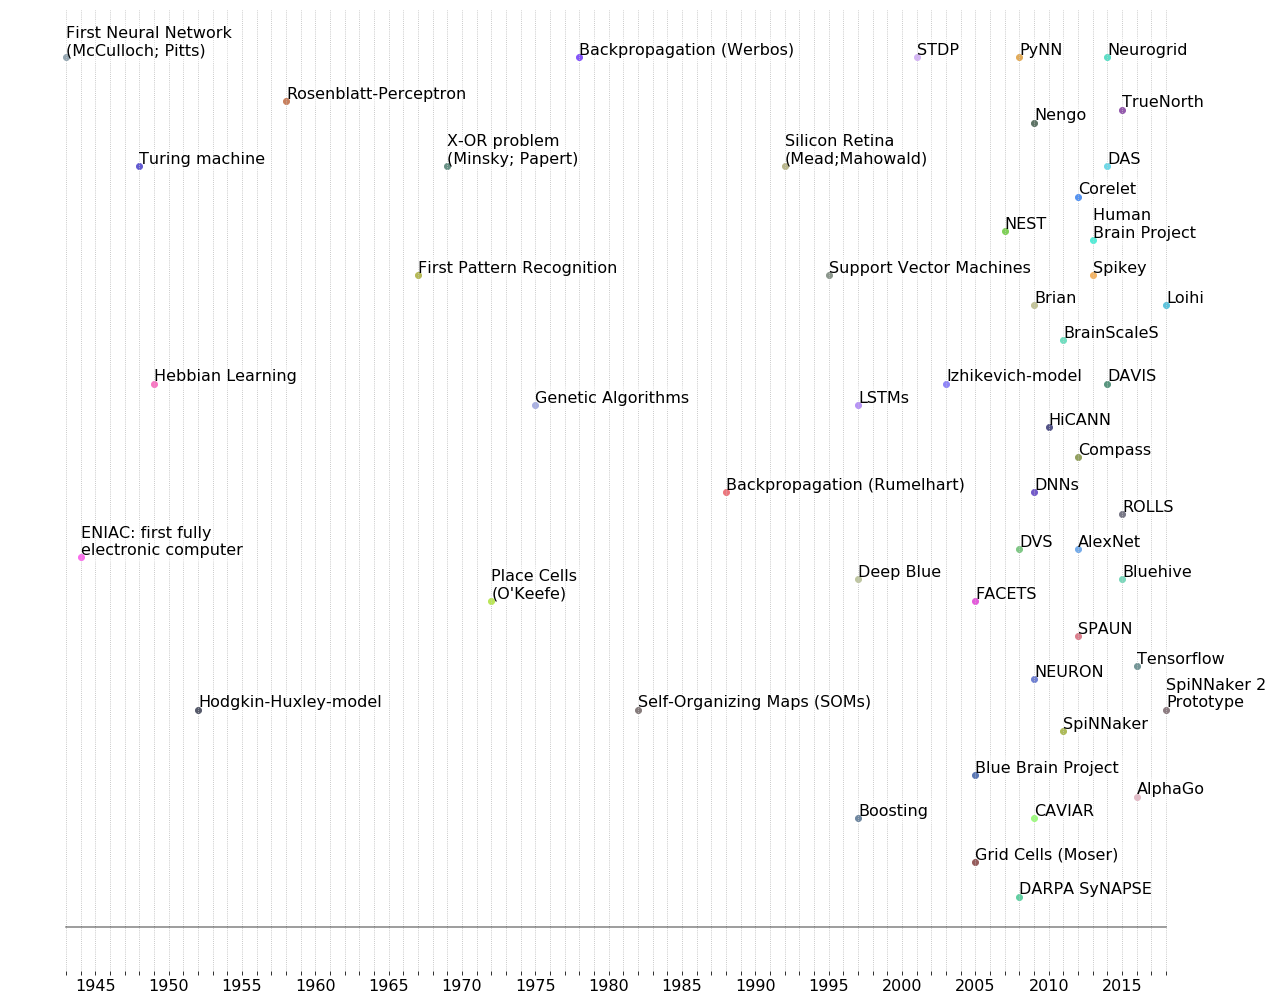

In [11]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(18, 14))

# Create the base line
start = min(date_list)
stop = max(date_list)
# print(start, stop)

# Iterate through releases annotating each one
for ii, (iname, idate) in enumerate(zip(name_list, date_list)):
    level = level_list[ii]*100
    vert = 'top' if level < 0 else 'bottom'
    if level > 0:
#         ax.scatter(idate, level, s=100, facecolor='w', edgecolor='k', zorder=9999)
        plt.scatter(idate, level, c=[np.random.rand(3,)])
        
    # Plot a line up to the text
    ax.plot((idate, idate), (0, level), c='w', alpha=.0)
    # Give the text a faint background and align it properly
#     ax.text(idate, level, iname,
#             horizontalalignment='left', verticalalignment=vert, fontsize=14,
#             backgroundcolor=(1., 1., 1., .3))
    ax.text(idate, level, iname,
            verticalalignment=vert, fontsize=16,
            backgroundcolor=(1., 1., 1., .3))
# ax.set(title="Matplotlib release dates")
# Set the xticks formatting
# ax.get_xaxis().set_major_locator(mdates.YearLocator(interval=5))
# ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.plot((start, stop), (0, 0), 'k', alpha=.5)
ax.set_xticklabels(year_labels, rotation=0, fontsize=16)
ax.grid(ls=':', axis='x')
# fig.autofmt_xdate()

# Remove components for a cleaner look
plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)

# plt.setp((ax.get_yticklabels() + ax.get_yticklines()), visible=False)
plt.tight_layout()
plt.savefig('/home/flo/git/diss/thesis/imgs/neuromorphic_timeline.pdf', dpi=1200)
plt.show()
